# The Housing Development Board - Past and Present
This notebook has been created to fulfil the **CA1** requirements for `IT8701 - Introduction to Programming for Data Science`. It analzyes the following HDB datasets downloaded from the [data.gov.sg](https://data.gov.sg/dataset?organization=housing-and-development-board).

**Section 1 - The HDB Story**
HDB has played an important role in nation building, taking charge of building affordable housing for all Singaporeans. We look at how much housing HDB has built over the years, and which years saw the most rapid construction of public housing.
- **Dataset 1:** [Dwelling and Commercial Units built since 1960](https://data.gov.sg/dataset/number-of-dwelling-units-and-commercial-developments-built)
- **Dataset 2:** [HDB Property Information](https://data.gov.sg/dataset/hdb-property-information)

**Section 2 - HDB as an asset class**
Should Singaporeans be putting money in resale flats? Or letting them out for rent? We analyze the distribution of resale price returns as well as median rents.
- **Dataset 3:** [HDB Resale Price Index](https://data.gov.sg/dataset/hdb-resale-price-index)
- **Dataset 4:** [Median Rent](https://data.gov.sg/dataset/median-rent-by-town-and-flat-type)
- **Dataset 5:** [Resale Flat Prices 2015-Present](https://data.gov.sg/dataset/resale-flat-prices)

**Section 3 - Market overview**
Is it easy to get financing for the purchase?
- **Dataset 6:** [Applications received to finance purchases](https://data.gov.sg/dataset/applications-received-to-finance-purchases-or-refinance-existing-mortgage-loans-with-bank-loans?view_id=a0994c10-a32d-4d37-b750-66ac70d10a2d&resource_id=190a43f4-e5f7-4a64-b071-f6352329ce4d)

What follows is a look at the numbers telling the story of HDB, its attractiveness as an investment and the current state of the markets.

## Preamble

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
%matplotlib inline
os.listdir()

['.ipynb_checkpoints',
 'applications-received-to-finance-purchases-refinance-mortgage-loan-with-bank-loans.csv',
 'CA1 Presentation.pptx',
 'completion-status-of-hdb-commercial-developments.csv',
 'completion-status-of-hdb-residential-developments.csv',
 'completion-status-of-hdb-residential-units-by-town-estate.csv',
 'hdb-property-information.csv',
 'housing-and-development-board-resale-price-index-1q2009-100-quarterly.csv',
 'land-area-and-dwelling-units-by-town.csv',
 'median-rent-by-town-and-flat-type.csv',
 'median_rent.csv',
 'no-of-dwelling-units-and-commercial-developments-built.csv',
 'number-of-resale-applications-registered-by-flat-type.csv',
 'resale-flat-prices-based-on-approval-date-1990-1999.csv',
 'resale-flat-prices-based-on-approval-date-2000-feb-2012.csv',
 'resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv',
 'resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv',
 'RonniePeh-T7359228-IanChongWeiMing-CA1.ipynb',
 '~$CA1

In [2]:
# filenames for the data
data_built = 'no-of-dwelling-units-and-commercial-developments-built.csv'
data_property_info = 'hdb-property-information.csv'
data_resale_index = 'housing-and-development-board-resale-price-index-1q2009-100-quarterly.csv'
data_resale_price1 = 'resale-flat-prices-based-on-approval-date-1990-1999.csv'
data_resale_price2 = 'resale-flat-prices-based-on-approval-date-2000-feb-2012.csv'
data_resale_price3 = 'resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv'
data_resale_price4 = 'resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv'
data_median_rent = 'median-rent-by-town-and-flat-type.csv'
data_built = 'no-of-dwelling-units-and-commercial-developments-built.csv'
data_applications = 'applications-received-to-finance-purchases-refinance-mortgage-loan-with-bank-loans.csv'
data_land = 'land-area-and-dwelling-units-by-town.csv'

In [3]:
# colour scheme
colour1='#b51f09'
colour2='#ee6146'
colour3='#dfbc5e'
colour4='#06763b'
colour5='#02115e'
colour6='#454545'
colour7='#666666'
colour8='#999999'
colour9='#cccccc'
colour_palette=[colour1,colour2,colour3,colour4,colour5,colour6,colour7,colour8,colour9]

----

## Section 1 - The HDB Story
We will take a look at HDB's role in building affordable housing for Singaporeans. Just how much have they done? And how have the physical characteristics of HDB flats changed over the years?

### Dataset 1 - Dwelling Units vs Commercial Developments
The first dataset to be explored shows the number of Dwelling Units and Commercial Developments built in each five year period since 1960. We will use `np.genfromtxt` to load the data into a `ndarray`.

We will also use masking to split the dataset according to `flat_type`

In [4]:
built = np.genfromtxt(data_built, 
                      skip_header=1,
                      dtype=[('start_year','i8'),
                             ('end_year','i8'),
                             ('flat_type','U32'),
                             ('no_of_completed_units','i8')], 
                      delimiter=',')
built_dwelling = built[built['flat_type']=='dwelling_units']
built_commercial = built[built['flat_type']=='commercial developments']
str1='Data preview'
str2='End preview'
print('{:-^100}'.format(str1))
print(built_dwelling)
print('{:-^100}'.format(str2))
print('There are [{}] lines in this array'.format(built_dwelling.shape[0]))

print('{:-^100}'.format(str1))
print(built_commercial)
print('{:-^100}'.format(str2))
print('There are [{:}] lines in this array'.format(built_commercial.shape[0]))
built_dwelling = np.delete(built_dwelling,-3) # Removing data for 2014 as it is double counting.
built_commercial = np.delete(built_commercial,-3) # Removing data for 2014 as it is double counting.

--------------------------------------------Data preview--------------------------------------------
[(1960, 1965, 'dwelling_units',  53777)
 (1966, 1970, 'dwelling_units',  63448)
 (1971, 1975, 'dwelling_units', 110362)
 (1976, 1980, 'dwelling_units', 130981)
 (1981, 1985, 'dwelling_units', 189299)
 (1986, 1990, 'dwelling_units', 119708)
 (1991, 1995, 'dwelling_units',  98994)
 (1996, 2000, 'dwelling_units', 157919)
 (2001, 2005, 'dwelling_units',  55135)
 (2006, 2010, 'dwelling_units',  29935)
 (2011, 2014, 'dwelling_units',  72218)
 (2011, 2015, 'dwelling_units',  96991)
 (2016, 2017, 'dwelling_units',  61235)]
--------------------------------------------End preview---------------------------------------------
There are [13] lines in this array
--------------------------------------------Data preview--------------------------------------------
[(1960, 1965, 'commercial developments',   653)
 (1966, 1970, 'commercial developments',  2791)
 (1971, 1975, 'commercial developments',  345

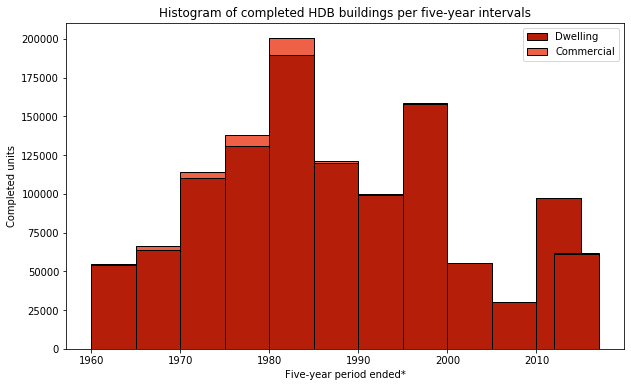

In [5]:
plt.figure(figsize=(10,6))
plt.title('Histogram of completed HDB buildings per five-year intervals')
plt.xlabel('Five-year period ended*')
plt.ylabel('Completed units')
plt.bar(built_dwelling['end_year']-2.5, # offsetting by 2.5 years for a width 5 graph to bring data in line
        built_dwelling['no_of_completed_units'],
        width=5,
        edgecolor='black',
        color = colour1,
        label='Dwelling')
plt.bar(built_commercial['end_year']-2.5, 
        built_commercial['no_of_completed_units'],
        width=5,
        color = colour2, 
        edgecolor='black',
        label='Commercial',
        bottom = built_dwelling['no_of_completed_units'])
plt.legend()
plt.show()

#### Analysis
As can be seen from the bar chart, HDB's projects consist virtually entirely of residential buildings, which is to be expected from its raison d'etre of being the statutory board in charge of affordable housing for Singaporeans.

Construction for HDB has picked up from the trough in recent years following a lull period during 2006-2010.

### Dataset 2 - HDB Property Info
Let's dig a little deeper into the typical housing types that HDB builds. We take a look at the HDB Property Info dataset, which describes what kind of units make up the various HDB buildings built across the years.

In [6]:
property_info=np.genfromtxt(data_property_info,dtype=[('blk_no','<u4'),
                                                      ('street','<U32'),
                                                      ('max_floor_lvl','<u4'),
                                                      ('year_completed','<u4'),
                                                      ('residential','<U2'),
                                                      ('commercial','<U2'),
                                                      ('market_hawker','<U2'),
                                                      ('miscellaneous','<U2'),
                                                      ('multistorey_carpark','<U2'),
                                                      ('precinct_pavilion','<U2'),
                                                      ('bldg_contract_town','<U2'),
                                                      ('total_dwelling_units','<u4'),
                                                      ('1room_sold','<u4'),
                                                      ('2room_sold','<u4'),
                                                      ('3room_sold','<u4'),
                                                      ('4room_sold','<u4'),
                                                      ('5room_sold','<u4'),
                                                      ('exec_sold','<u4'),
                                                      ('multigen_sold','<u4'),
                                                      ('studio_apartment_sold','<u4'),
                                                      ('1room_rental','<u4'),
                                                      ('2room_rental','<u4'),
                                                      ('3room_rental','<u4'),
                                                      ('other_room_rental','<u4')],
                            names=True,delimiter=',')
print('{:-^100}'.format(str1))
print(property_info)
print('{:-^100}'.format(str2))
print('There are [{:}] lines in this array'.format(property_info.shape[0]))

--------------------------------------------Data preview--------------------------------------------
[(         1, 'BEACH RD', 16, 1970, 'Y', 'Y', 'N', 'N', 'N', 'N', 'KW', 142, 0, 1, 138,  1, 2, 0, 0, 0,   0,   0, 0, 0)
 (         1, 'BEDOK STH AVE 1', 14, 1975, 'Y', 'N', 'N', 'Y', 'N', 'N', 'BD', 206, 0, 0, 204,  0, 2, 0, 0, 0,   0,   0, 0, 0)
 (         1, 'CANTONMENT RD',  2, 2010, 'N', 'Y', 'N', 'N', 'N', 'N', 'CT',   0, 0, 0,   0,  0, 0, 0, 0, 0,   0,   0, 0, 0)
 ...
 (       999, 'BUANGKOK CRES',  2, 2018, 'N', 'N', 'N', 'Y', 'N', 'Y', 'HG',   0, 0, 0,   0,  0, 0, 0, 0, 0,   0,   0, 0, 0)
 (4294967295, 'BUANGKOK CRES', 18, 2018, 'Y', 'N', 'N', 'N', 'N', 'N', 'HG', 306, 0, 0,   0,  0, 0, 0, 0, 0, 136, 170, 0, 0)
 (4294967295, 'BUANGKOK CRES', 17, 2018, 'Y', 'N', 'N', 'N', 'N', 'N', 'HG', 126, 0, 0,  31, 95, 0, 0, 0, 0,   0,   0, 0, 0)]
--------------------------------------------End preview---------------------------------------------
There are [12144] lines in this array


.
.
.

**That is a lot of data!**

We need to shape the data to simplify our analysis. Here we will look at the types of HDB properties that were completed in different years and analyze their characteristics:

**Methodology**
1. Select the relevant columns
2. Use `np.unique` to indexs the data then use `np.split` the data according to year completed
3. Sum the following values: `'1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold`
4. Average the following values:  `'max_floor_lvl'`
5. Use `matplotlib` to draw line charts for each of the types sold
6. Use `matplotlib` to draw a column chart for `max_floor_lvl`

In [7]:
property_info_sliced = np.sort(property_info[['year_completed',
                                              'max_floor_lvl',
                                              '1room_sold',
                                              '2room_sold',
                                              '3room_sold',
                                              '4room_sold',
                                              '5room_sold',
                                              'exec_sold',
                                              'multigen_sold',
                                              'studio_apartment_sold']][property_info['residential'] == 'Y'],order=['year_completed'])
print('{:-^100}'.format(str1))
print(property_info_sliced) # Get the array with only the relevant data
print('{:-^100}'.format(str2))
print('There are [{:}] lines in this array'.format(property_info_sliced.shape[0]))

--------------------------------------------Data preview--------------------------------------------
[(1937,  3, 0,  0,  8,  30, 0, 0, 0,  0)
 (1937,  3, 0,  0,  8,  34, 0, 0, 0,  0)
 (1937,  3, 0,  0,  8,  34, 0, 0, 0,  0) ...
 (2019, 22, 0,  0, 63,   0, 0, 0, 0,  0)
 (2019, 28, 0,  0,  0,   0, 0, 0, 0,  0)
 (2019, 34, 0, 30, 62, 132, 0, 0, 0, 63)]
--------------------------------------------End preview---------------------------------------------
There are [9970] lines in this array


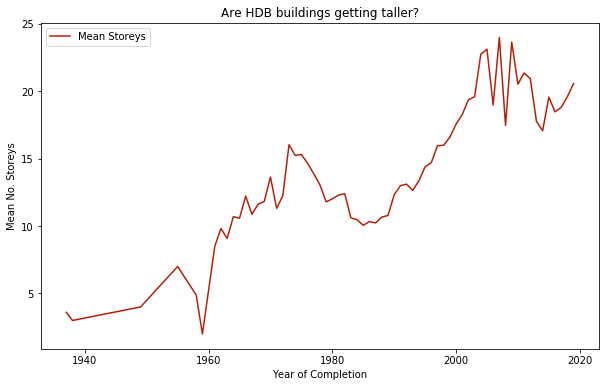

In [8]:
property_info_year = np.unique(property_info_sliced['year_completed']) # Return unique years
property_info_year_index = np.unique(property_info_sliced['year_completed'],
                                     return_index=True) # Return the index of the np.unique
property_info_split = np.split(property_info_sliced,
                               property_info_year_index[1][1:]) #Split the array into sub arrays at the transition between year_completed
max_floor_lvl_mean = np.array([])
for i in range(len(property_info_year)):
    mean = round(np.mean(property_info_split[i]['max_floor_lvl']),2)
    max_floor_lvl_mean = np.append(max_floor_lvl_mean,mean) # Accumulate the mean storeys for each year.
    
# Plotting the average storeys of HDB Buildings over the years
plt.figure(figsize=(10,6))
plt.title('Are HDB buildings getting taller?')
plt.xlabel('Year of Completion')
plt.ylabel('Mean No. Storeys')
plt.plot(property_info_year,
         max_floor_lvl_mean,
         color=colour1,
         label='Mean Storeys')
plt.legend()

#### Analysis
The data shows that the mean `max_floor_lvl` for HDB buildings more recently completed has been steadily increasing, in line with increasing scarcity of land for development in Singapore. Building enough low cost housing on a tiny island nation remains a strategic ojective to maintain social harmony and order.

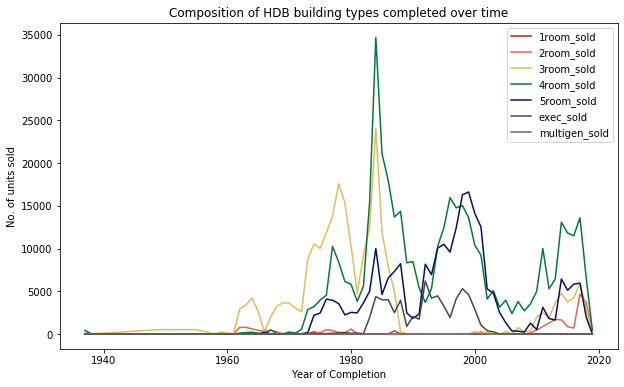

In [9]:
# Initialise empty arrays for accumulation of buildings sold
one_room_sold = np.array([])
two_room_sold = np.array([])
three_room_sold = np.array([])
four_room_sold = np.array([])
five_room_sold = np.array([])
exec_sold = np.array([])
multigen_sold = np.array([])
studio_sold = np.array([])

# Initialise dictionary for looped accumulation
property_types={
    '1room_sold':one_room_sold,
    '2room_sold':two_room_sold,
    '3room_sold':three_room_sold,
    '4room_sold':four_room_sold,
    '5room_sold':five_room_sold,
    'exec_sold':exec_sold,
    'multigen_sold':multigen_sold
               }

for key, value in property_types.items():
    for i in range(len(property_info_year_index[1])):
        property_type_sum = np.sum(property_info_split[i][key])
        value = np.append(value, property_type_sum)
        property_types[key]=value
plt.figure(figsize=(10,6))
plt.xlabel('Year of Completion')
plt.ylabel('No. of units sold')
plt.title('Composition of HDB building types completed over time')
i=0
for k, v in property_types.items():
  plt.plot(property_info_year,
           list(v),
           color=colour_palette[i],
           label=k)
  i+=1
del i
plt.legend()
plt.show()

### Conclusion
3 room flats were the order of the day during the early years of HDB, being the most often built. The early 1980's saw a huge boom in construction across all flat types, and 4 room flats built outnumbered that of 3 room flats for the first time. However, starting in the  next construction boom in the early 90's, 4 room and 5 room flats took over as the most popular.

----

## Section 2 - HDB as an asset class
Are HDB resale flats an attractive asset class for investment? We take a look at the **HDB Resale Price Index** datasets, and analyze the distributions of the returns.

### Dataset 3 - HDB Resale Price Index
This is a straightforward time-series dataset, so we shall plot a line-chart over time.

Text(0.5, 1.0, 'HDB Resale Price index Quarterly')

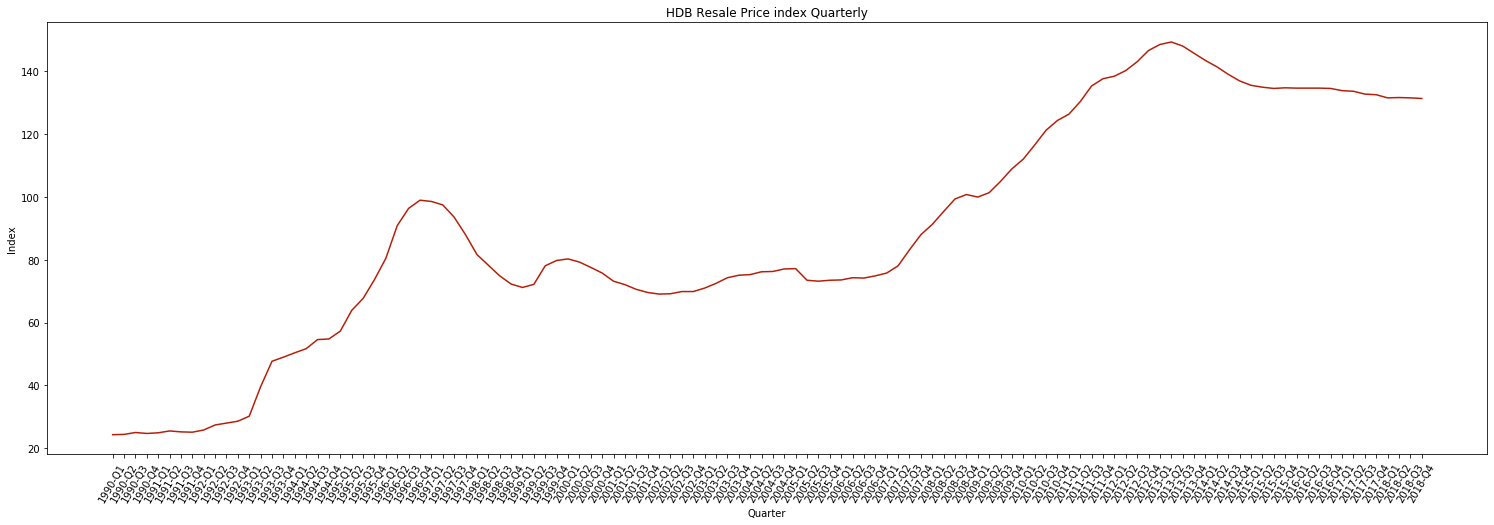

In [10]:
resale_price_index = np.genfromtxt(data_resale_index,delimiter=',',
                                   skip_header=1,
                                   dtype=[('Quarter','U8'),
                                          ('Index','f8')]
                                  )
fig = plt.figure(figsize=(20,6))
ax = fig.add_axes([1,1,1,1])
plt.plot(resale_price_index['Quarter'], resale_price_index['Index'], color=colour1)
plt.xlabel('Quarter')
plt.ylabel('Index')
ax.set_xticks(resale_price_index['Quarter'])
ax.set_xticklabels(resale_price_index['Quarter'],rotation=60)
ax.set_title("HDB Resale Price index Quarterly")

---------------------------------------Descriptive Statistics---------------------------------------
No. Observations : 115
Range : (-7.71, 23.74)
Mean : 1.371391304347826
Variance : 15.934127871853548
Skewness : 2.15038342330351
Kurtosis : 9.312101476992263


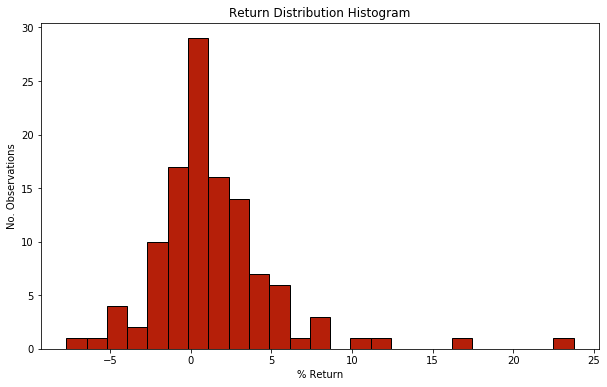

In [11]:
resale_price_change = np.round(np.diff(resale_price_index['Index']) / resale_price_index['Index'][1:] * 100,2)
plt.figure(figsize=(10,6))
plt.hist(resale_price_change, 
         bins=25, 
         histtype='bar', 
         align='mid', 
         orientation='vertical', 
         color=colour1,
         edgecolor='black')
plt.xlabel('% Return')
plt.ylabel('No. Observations')
plt.title('Return Distribution Histogram')

print('{:-^100}'.format('Descriptive Statistics'))
descriptive_stats = ['No. Observations',
                    'Range', 
                    'Mean',
                    'Variance',
                    'Skewness',
                    'Kurtosis']
for i in range(len(descriptive_stats)):
    print('{} : {}'.format(descriptive_stats[i],stats.describe(resale_price_change)[i]))

#### Analysis
As we can see from the high kurtosis and positive skew of distribution, the HDB resale market is one that rarely goes down. 

Most of the quarterly returns lie above the inflation rate of 1%, meaning just the quarterly returns on the market are enough to combat inflation for the year, making it a very good store of value.

### Dataset 4 - Median Rental
Instead of selling your house, why not rent it out instead? We take a look at the dataset for median monthly rental for each of the flat types.

**Methodology:**

1. Use `np.genfromtxt`, sorting by `Flat_Type`
2. `np.isnan()` to index NaN values and drop them. We are looking for transacted rental prices.
3. Determine the `np.split` index using `np.unique`
4. `np.split` the array into sub-arrays of each `Flat_Type` with rental data
5. Plot a boxplot for each of the sub-arrays.

Text(0.5, 1.0, 'Monthly Rental by Flat Type')

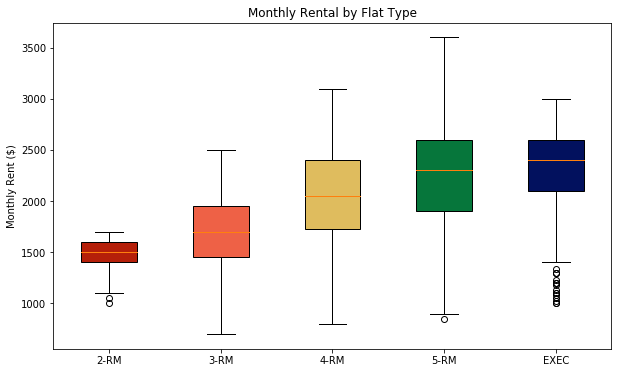

In [12]:
plt.figure(figsize=(10,6))
median_rent_raw = np.sort(np.genfromtxt(data_median_rent,
                                        dtype=[('Quarter','<U8'),
                                               ('Town','<U16'),
                                               ('Flat Type','<U16'),
                                               ('Median Rent','<f8')],
                                        delimiter=',',
                                        skip_header=True),
                          order='Flat_Type')
median_rent_not_na = np.invert(np.isnan(median_rent_raw['Median_Rent']))
median_rent = median_rent_raw[median_rent_not_na]
median_rent_index = np.unique(median_rent['Flat_Type'],return_index=True)
median_rent_split = np.split(median_rent['Median_Rent'],median_rent_index[1][1:])
box=plt.boxplot(median_rent_split,labels=median_rent_index[0],patch_artist=True)
for patch, color in zip(box['boxes'], colour_palette[0:8]):
    patch.set_facecolor(color)
plt.ylabel('Monthly Rent ($)')
plt.title('Monthly Rental by Flat Type')

### Dataset 5 - Resale Flat Prices
We now take a look at recent transaction data from HDB.

How much more are you expected to pay on average for each additional square foot of real estate? And does `flat_type` affect it? For the we construct a `matplotlib`  scatter plot with `resale_price` as the Y-variable, and `floor_area_sqm` as the X-variable, colour stratified according to `flat_type`.

How much are you expected to pay for each flat type overall?

We use `matplotlib` to draw a box plot of transacted prices for each flat type.

**Methodology**
1. Use `np.genfromtxt` to load the `.csv` sorted by `flat_type`
2. Index the data using `np.unique`, then pass it to `np.split` to create sub arrays by `flat_type`
3. Use `for` loop to iterate by `flat_type` and `plt.scatter`

**NOTE:** There are four data sets on this topic spanning four time periods. We shall look at only the last data set, both for brevity sake, and the fact that post 2014 cooling measures the property market dynamic has changed.

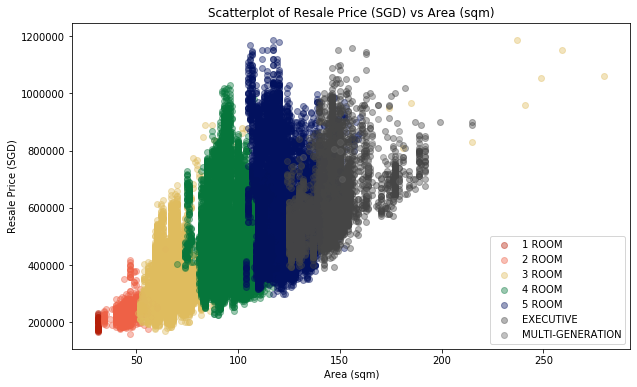

In [13]:
plt.figure(figsize=(10,6))
resale_price = np.sort(np.genfromtxt(data_resale_price4,
                             skip_header=1,
                             dtype=[('month','U8'),
                                    ('town','U16'),
                                    ('flat_type','U16'),
                                    ('block','U8'),
                                    ('street_name','U32'),
                                    ('storey_range','U16'),
                                    ('floor_area_sqm','u4'),
                                    ('flat_model','U32'),
                                    ('lease_commence_date','u4'),
                                    ('remaining_lease','u4'),
                                    ('resale_price','u4')],
                             delimiter=','),
                       order='flat_type')
resale_price_split_index = np.unique(resale_price['flat_type'],return_index=True)
resale_price_split = np.split(resale_price[['flat_type',
                                            'floor_area_sqm',
                                            'resale_price']],
                              resale_price_split_index[1][1:])
for i in range(len(resale_price_split_index[0])):
    plt.scatter(resale_price_split[i]['floor_area_sqm'],
                resale_price_split[i]['resale_price'],
                color=colour_palette[i],
                label=resale_price_split_index[0][i],
                alpha=0.4)
plt.xlabel('Area (sqm)')
plt.ylabel('Resale Price (SGD)')
plt.title('Scatterplot of Resale Price (SGD) vs Area (sqm)')
plt.legend()
plt.show()

The data is quite clustered up. For greater clarity, we split the data into 7 subplots

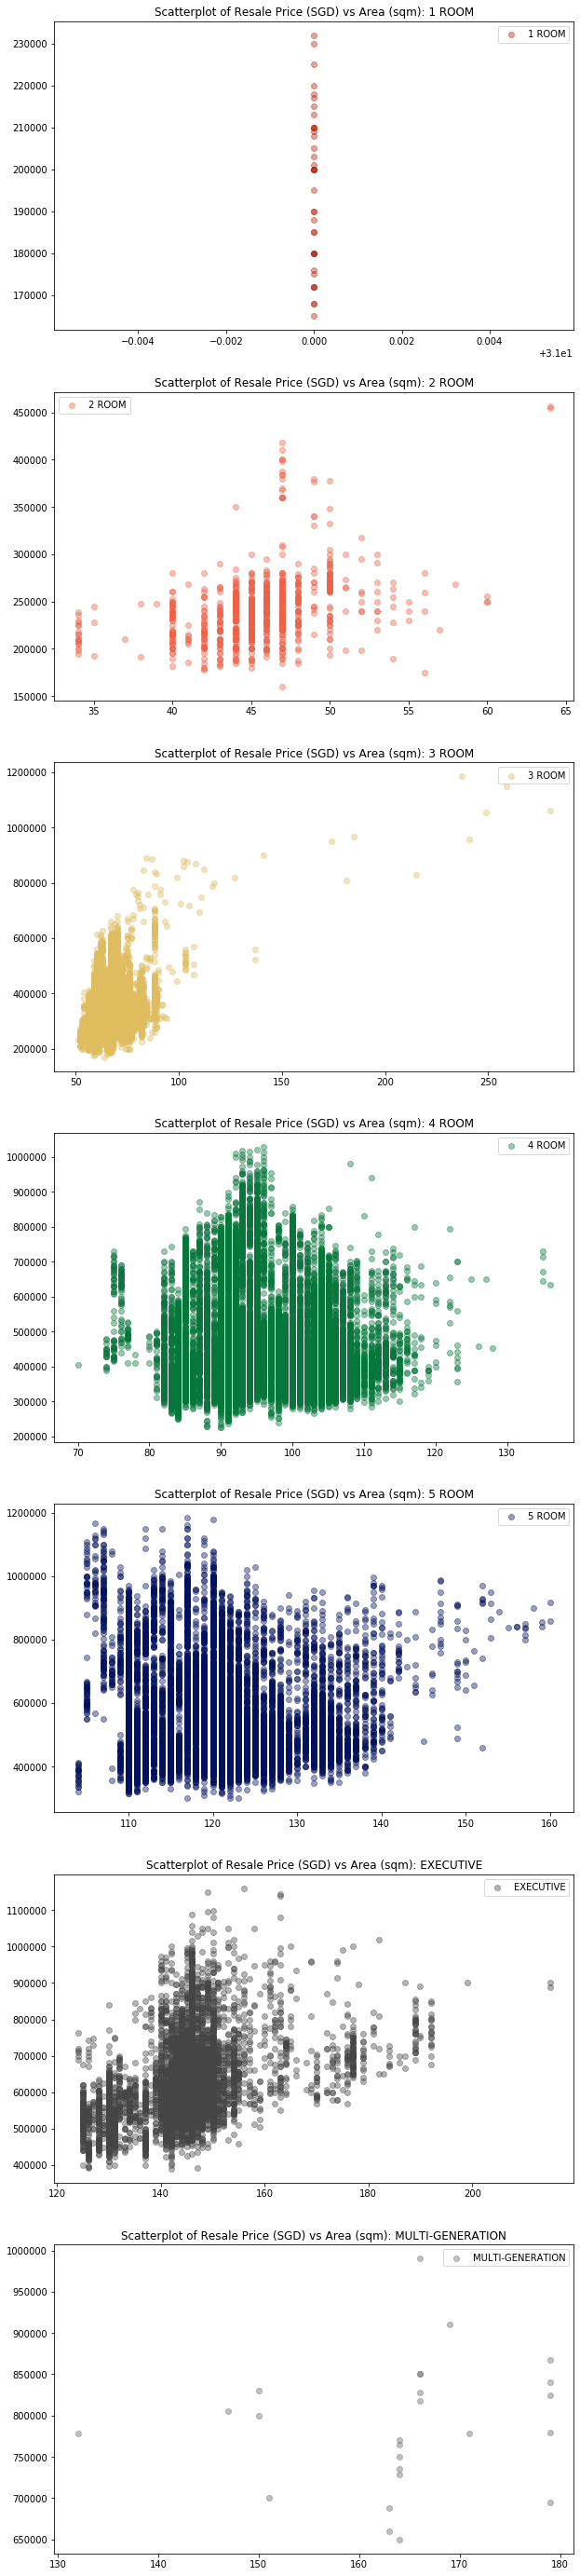

In [14]:
ax1=ax2=ax3=ax4=ax5=ax6=ax7=0 #initialize empty variables
resale_price_subplots = (ax1,ax2,ax3,ax4,ax5,ax6,ax7)
fig, (resale_price_subplots) = plt.subplots(nrows=len(resale_price_subplots),ncols=1,figsize=(10,50))
for i in range(len(resale_price_subplots)):
    resale_price_subplots[i].scatter(resale_price_split[i]['floor_area_sqm'],resale_price_split[i]['resale_price'],label=resale_price_split_index[0][i],color=colour_palette[i],alpha=0.4)
    resale_price_subplots[i].set(title='Scatterplot of Resale Price (SGD) vs Area (sqm): '+resale_price_split_index[0][i])
    resale_price_subplots[i].legend()

Text(0.5, 1.0, 'Resale Price by Flat Type')

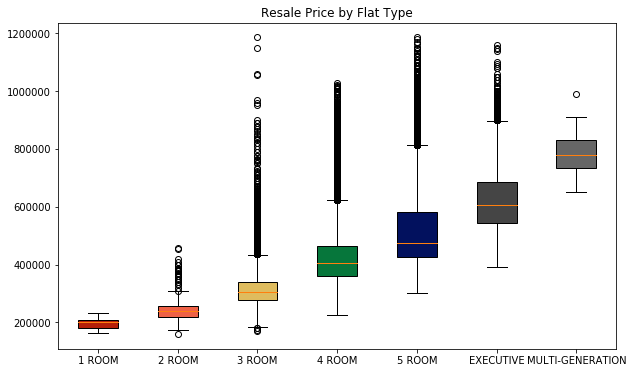

In [15]:
plt.figure(figsize=(10,6))
resale_box_data = [resale_price_split[i]['resale_price'] for i in range(len(resale_price_split_index[1]))]
box = plt.boxplot(resale_box_data,labels=resale_price_split_index[0], patch_artist=True)
for patch, color in zip(box['boxes'], colour_palette[0:8]):
    patch.set_facecolor(color)
plt.title('Resale Price by Flat Type')

Now that we have both the transaction value and rental income per month, we can analyze how profitable renting out your flat is, relative to the investment required.

Text(0.5, 1.0, 'Rental Yield by Flat Type')

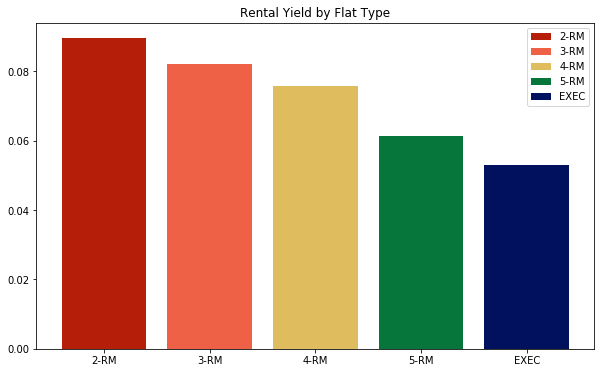

In [16]:
# mean rental * 12 / mean transaction value per category
mean_rental_yield={}
for i in range(len(median_rent_index[0])):
    mean_rental_yield[median_rent_index[0][i]]=12*np.mean(median_rent_split[i])/np.mean(resale_price_split[i]['resale_price'])
i=0
plt.figure(figsize=(10,6))
for key,value in mean_rental_yield.items():
    plt.bar(key,value,color=colour_palette[i],label=key)
    plt.legend()
    i+=1
del i
plt.title('Rental Yield by Flat Type')

Based on mean values, it would seem investing in a smaller sized house increases your rental yield

1 ROOM 	 38
2 ROOM 	 931
3 ROOM 	 21312
4 ROOM 	 34365
5 ROOM 	 20267
EXECUTIVE 	 6660
MULTI-GENERATION 	 25


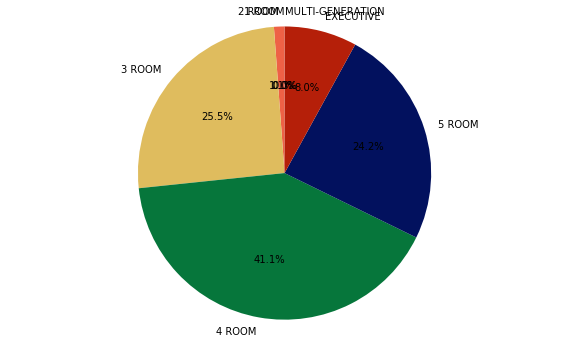

In [17]:
resale_price_pie = []
for i in range(len(resale_price_split_index[1])):
    resale_price_pie = np.append(resale_price_pie,resale_price_split[i].shape[0])
    print(np.unique(resale_price['flat_type'])[i],'\t',resale_price_split[i].shape[0])
plt.figure(figsize=(10,6)).set_facecolor('white')
plt.pie(resale_price_pie,
        labels=resale_price_split_index[0],
        autopct='%1.1f%%',
        shadow=False,
        startangle=90,
        colors=colour_palette[0:5])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Analysis
The most commonly transacted property type was the 4 Room flat. Buyers looking for a more liquid property type might want to buy a 4 Room flat compared with an Executive.

----

## Section 3 - Market Overview

What is the state of the market now? 

### Dataset 6 - Applications received to finance purchases
Is it getting easier to get financing? How many applications are being filed for financing? We take a look at the dataset.

**Methodology**

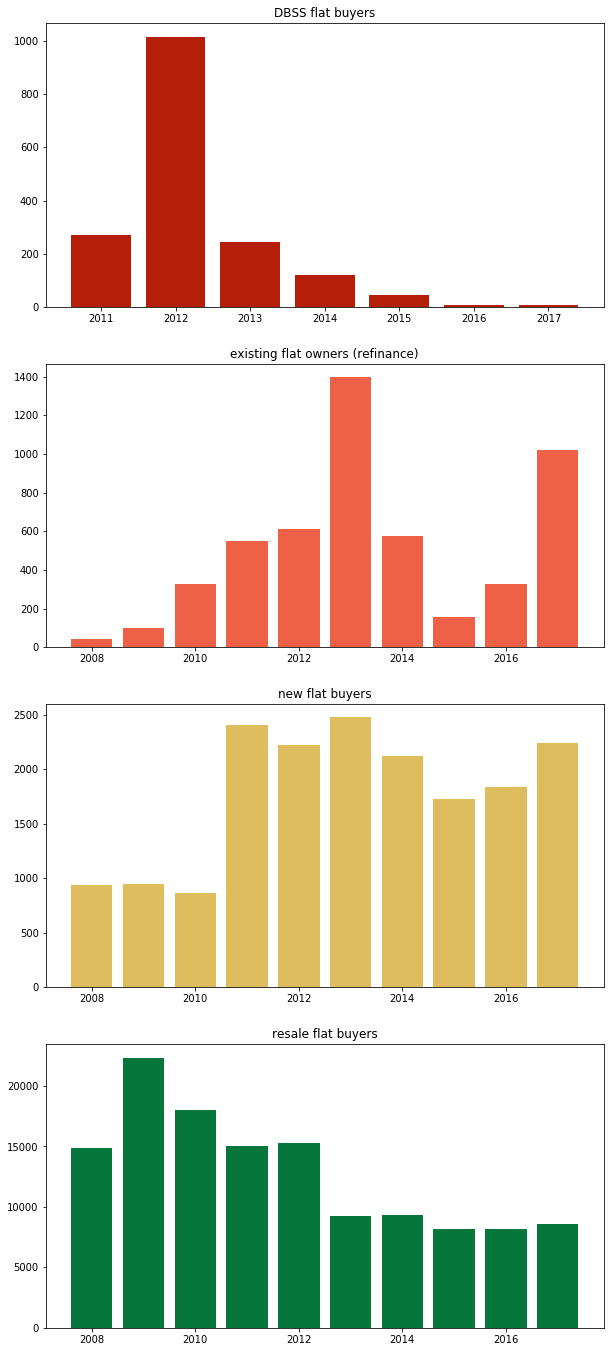

In [18]:
applications = np.sort(np.genfromtxt(data_applications,
                             skip_header=1,
                             dtype=[('financial_year','u4'),
                                    ('application_type','U32'),
                                    ('no_of_applications','u4')],
                             delimiter=','),
                       order=['application_type','financial_year'])
applications_index = np.unique(applications['application_type'],
                               return_index=True)
applications_split = np.split(applications,
                              applications_index[1][1:])
ax1=ax2=ax3=ax4=0 #initialize empty variables
applications_subplots = (ax1,ax2,ax3,ax4)
fig, (applications_subplots) = plt.subplots(nrows=len(applications_subplots),ncols=1,figsize=(10,24))
for i in range(len(applications_subplots)):
    applications_subplots[i].bar(applications_split[i]['financial_year'],applications_split[i]['no_of_applications'],color=colour_palette[i])
    applications_subplots[i].set(title=applications_index[0][i])

#### Analysis
Post 2013 property cooling measures which were aimed at stemming speculative activity in the real estate market, the amount of financing applications for non-first time buyers has decreased substantially. However, applications for new flat buyers are still alive and well, since the aim of the cooling measures was to ensure financing flowed towards citizens buying their first house.

----

# Conclusion

The analysis in this report is far from exhaustive or in-depth, but offers a high level overview of the market that the Housing Development Board has created.

HDB has been instrumental in building up flats for Singaporeans, so that citizens can afford to buy their own home. This is important for matters of social integrity, as citizens are more likely to remain loyal if they are invested in the future of Singapore, and real estate remains the largest store of wealth a person can have.

The Singaporean HDB real estate market is also liquid and robust, offering investors a viable asset class to own. Buying and holding a flat can most definitely beat inflation regularly, and average rental yields make HDB renting an attractive income source. One caveat is that these figures do not account for tax effects, which will lower returns.

However, allowing capital to flow freely into the HDB market will inflate prices far beyond the reach of the average Singaporean. Hence, a slew of cooling measures were put in place beginning October 2012 to make it harder for non-first time buyers to obtain financing to buy a house. This was certainly effective in reducing the applications for financing submitted by resale flat buyers.